## 3.12　最適化関数の利用


In [1]:
# !pip install japanize_matplotlib | tail -n 1
# !pip install torchviz | tail -n 1

In [2]:
import torch
import numpy as np
import japanize_matplotlib
import torch.optim as optim
import matplotlib.pyplot as plt
from torchviz import make_dot
from IPython.display import display

In [3]:
%matplotlib inline

In [4]:
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])

x = sampleData1[:, 0]
y = sampleData1[:, 1]

X = x - x.mean()
Y = y - y.mean()

X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

def pred(X):
  return W * X + B

Yp = pred(X)

def mse(Yp, Y):
  loss = ((Yp - Y) ** 2).mean()
  return loss

loss = mse(Yp, Y)

loss.backward()

lr = 0.001

with torch.no_grad():
  W -= lr * W.grad
  B -= lr * B.grad

  W.grad.zero_()
  B.grad.zero_()

In [5]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500
lr = 0.001

optimizer = optim.SGD([W, B], lr=lr)

history = np.zeros((0, 2))

In [6]:
for epoch in range(num_epochs):
  Yp = pred(X)
  loss = mse(Yp, Y)
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

  if (epoch %10 == 0):
    item = np.array([epoch, loss.item()])
    history = np.vstack((history, item))
    print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 10.3855
epoch = 20  loss = 8.5173
epoch = 30  loss = 7.3364
epoch = 40  loss = 6.5858
epoch = 50  loss = 6.1047
epoch = 60  loss = 5.7927
epoch = 70  loss = 5.5868
epoch = 80  loss = 5.4476
epoch = 90  loss = 5.3507
epoch = 100  loss = 5.2805
epoch = 110  loss = 5.2275
epoch = 120  loss = 5.1855
epoch = 130  loss = 5.1507
epoch = 140  loss = 5.1208
epoch = 150  loss = 5.0943
epoch = 160  loss = 5.0703
epoch = 170  loss = 5.0480
epoch = 180  loss = 5.0271
epoch = 190  loss = 5.0074
epoch = 200  loss = 4.9887
epoch = 210  loss = 4.9708
epoch = 220  loss = 4.9537
epoch = 230  loss = 4.9373
epoch = 240  loss = 4.9217
epoch = 250  loss = 4.9066
epoch = 260  loss = 4.8922
epoch = 270  loss = 4.8783
epoch = 280  loss = 4.8650
epoch = 290  loss = 4.8522
epoch = 300  loss = 4.8399
epoch = 310  loss = 4.8281
epoch = 320  loss = 4.8167
epoch = 330  loss = 4.8058
epoch = 340  loss = 4.7953
epoch = 350  loss = 4.7853
epoch = 360  loss = 4.7756
epoch = 37

In [7]:
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

print(f'初期状態: 損失: {history[0, 1]:.4f}')
print(f'最終状態: 損失: {history[-1, 1]:.4f}')

W =  1.820683
B =  0.3675114
初期状態: 損失: 13.3520
最終状態: 損失: 4.6796


In [8]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500
lr = 0.001

optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)

history2 = np.zeros((0, 2))

In [9]:
for epoch in range(num_epochs):
  Yp = pred(X)
  loss = mse(Yp, Y)
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

  if (epoch %10 == 0):
    item = np.array([epoch, loss.item()])
    history2 = np.vstack((history2, item))
    print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 5.7585
epoch = 20  loss = 5.9541
epoch = 30  loss = 5.0276
epoch = 40  loss = 4.8578
epoch = 50  loss = 4.7052
epoch = 60  loss = 4.6327
epoch = 70  loss = 4.5940
epoch = 80  loss = 4.5698
epoch = 90  loss = 4.5574
epoch = 100  loss = 4.5495
epoch = 110  loss = 4.5452
epoch = 120  loss = 4.5426
epoch = 130  loss = 4.5411
epoch = 140  loss = 4.5403
epoch = 150  loss = 4.5398
epoch = 160  loss = 4.5395
epoch = 170  loss = 4.5393
epoch = 180  loss = 4.5392
epoch = 190  loss = 4.5391
epoch = 200  loss = 4.5391
epoch = 210  loss = 4.5391
epoch = 220  loss = 4.5391
epoch = 230  loss = 4.5390
epoch = 240  loss = 4.5390
epoch = 250  loss = 4.5390
epoch = 260  loss = 4.5390
epoch = 270  loss = 4.5390
epoch = 280  loss = 4.5390
epoch = 290  loss = 4.5390
epoch = 300  loss = 4.5390
epoch = 310  loss = 4.5390
epoch = 320  loss = 4.5390
epoch = 330  loss = 4.5390
epoch = 340  loss = 4.5390
epoch = 350  loss = 4.5390
epoch = 360  loss = 4.5390
epoch = 370

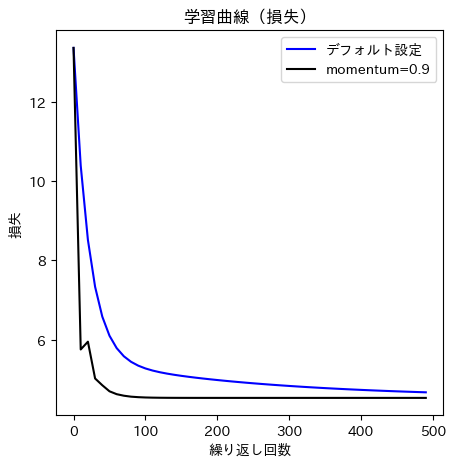

In [10]:
plt.figure(figsize=(5, 5))
plt.plot(history[:, 0], history[:, 1], 'b', label='デフォルト設定')
plt.plot(history2[:, 0], history2[:, 1], 'k', label='momentum=0.9')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.legend()
plt.title('学習曲線（損失）')
plt.show()